<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [27]:
!pip install pandas
!pip install matplotlib
!pip install seaborn 

### Step 1: Import Required Libraries


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [8]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [9]:
## Write your code here
df.columns = df.columns.str.strip() 
df.info()
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
subset_cols = ["MainBranch", "Employment", "RemoteWork", "Country"]

duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]

print("Duplicate rows based on subset:", len(duplicates_subset))
duplicates_subset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
Number of duplicate rows: 0
Duplicate rows based on subset: 61797


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


##### Task 2: Remove the duplicate rows from the dataframe.



In [10]:
## Write your code here
df_clean = df.copy()
df_clean = df_clean.drop_duplicates(subset=subset_cols)
df_no_duplicates = df_clean.drop_duplicates(
    subset=subset_cols,
    keep="first"
)

print("Original rows:", len(df))
print("After removing subset-based duplicates:", len(df_no_duplicates))

Original rows: 65437
After removing subset-based duplicates: 6941


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [11]:
## Write your code here
df_clean.isna().sum()
df_clean[df_clean.isna().any(axis=1)]
missing_summary = pd.DataFrame({
    "Missing_Count": df_clean.isna().sum(),
    "Missing_Percent": (df_clean.isna().mean() * 100).round(2)
})
missing_summary_sorted = missing_summary.sort_values(
    by="Missing_Count",
    ascending=False
)
columns_with_missing = missing_summary_sorted[
    missing_summary_sorted["Missing_Count"] > 0
]
with pd.option_context("display.max_rows", None):
    print(columns_with_missing)

                                Missing_Count  Missing_Percent
AINextMuch less integrated               6730            96.96
AINextLess integrated                    6552            94.40
AINextNo change                          5496            79.18
ConvertedCompYearly                      5253            75.68
AINextMuch more integrated               5171            74.50
CompTotal                                4934            71.08
Knowledge_9                              4923            70.93
Knowledge_7                              4917            70.84
Frequency_3                              4917            70.84
ProfessionalTech                         4917            70.84
Knowledge_8                              4912            70.77
Knowledge_6                              4912            70.77
Knowledge_5                              4905            70.67
Knowledge_2                              4899            70.58
Knowledge_3                              4897          

##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [12]:
## Write your code here
print("Number of rows having no value in RemoteWork:",df_clean["RemoteWork"].isna().sum())


Number of rows having no value in RemoteWork: 2002


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [13]:
## Write your code here
df_clean["RemoteWork"].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    1850
Remote                                  1769
In-person                               1320
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [14]:
## Write your code here
valuecount = df_clean["RemoteWork"].value_counts()
majority_value = valuecount.idxmax()
majority_count = valuecount.max()

print("Majority value:", majority_value)
print("Count:", majority_count)

Majority value: Hybrid (some remote, some in-person)
Count: 1850


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [18]:
## Write your code here
valuecount = df_clean["RemoteWork"].value_counts(dropna=False)
df_clean["RemoteWork_Imputed"] = df_clean["RemoteWork"].fillna(majority_value)
print(df_clean["RemoteWork_Imputed"].value_counts())

RemoteWork_Imputed
Hybrid (some remote, some in-person)    3852
Remote                                  1769
In-person                               1320
Name: count, dtype: int64


##### Task 8: Check for any compensation-related columns and describe their distribution.



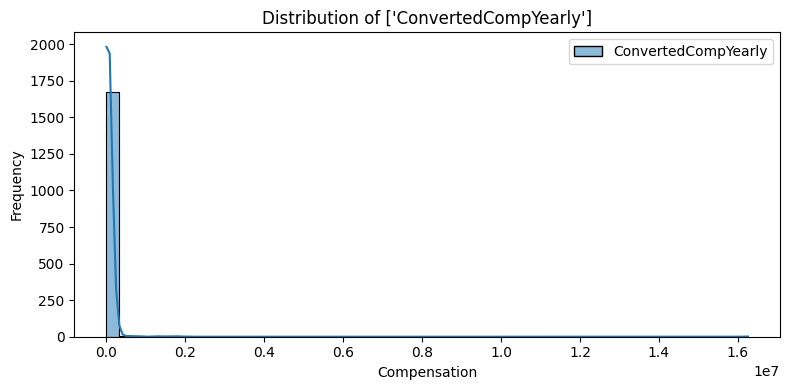

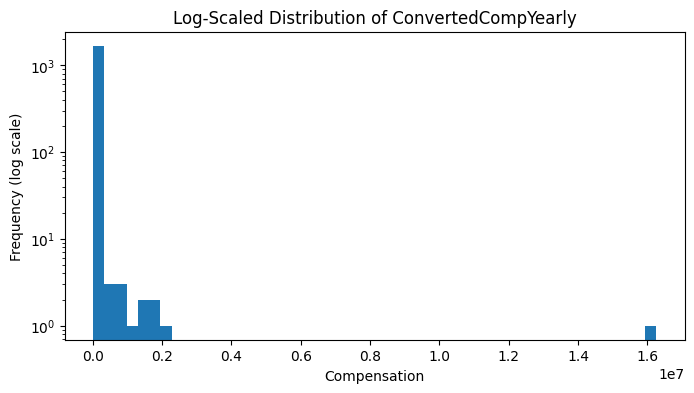

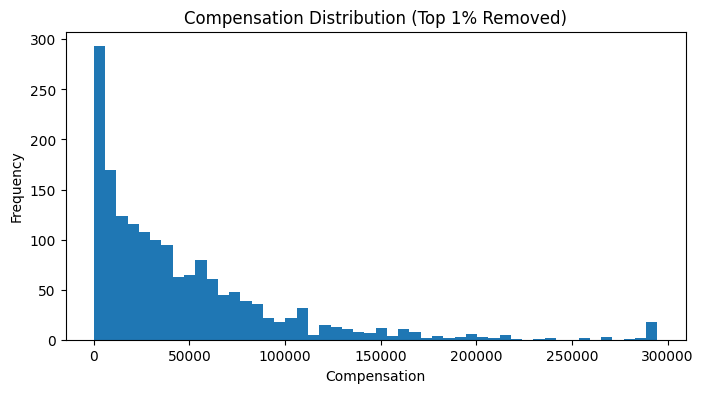

In [36]:
## Write your code here
comp_col = ["ConvertedCompYearly"]
df_clean["ConvertedCompYearly"].describe()

plt.figure(figsize=(8, 4))
sns.histplot(df_clean[comp_col].dropna(), bins=50, kde=True)
plt.title(f"Distribution of {comp_col}")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df_clean["ConvertedCompYearly"].dropna(), bins=50, log=True)
plt.title("Log-Scaled Distribution of ConvertedCompYearly")
plt.xlabel("Compensation")
plt.ylabel("Frequency (log scale)")
plt.show()


upper_limit = df_clean["ConvertedCompYearly"].quantile(0.99)

plt.figure(figsize=(8, 4))
plt.hist(
    df_clean["ConvertedCompYearly"].dropna().clip(upper=upper_limit),
    bins=50
)
plt.title("Compensation Distribution (Top 1% Removed)")
plt.xlabel("Compensation")
plt.ylabel("Frequency")
plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
